In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1ba809f84a2edb2f0ac3f3f43124f13b


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | vostok
Processing Record 4 of Set 1 | ures
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | waipawa
Processing Record 8 of Set 1 | visby
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | mopti
Processing Record 11 of Set 1 | aklavik
Processing Record 12 of Set 1 | marawi
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | caravelas
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | adrar
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 1 | jiazi
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of S

Processing Record 38 of Set 4 | tura
Processing Record 39 of Set 4 | altay
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | santa marta
Processing Record 42 of Set 4 | port alfred
Processing Record 43 of Set 4 | duncan
Processing Record 44 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 4 | halifax
Processing Record 46 of Set 4 | skagastrond
City not found. Skipping...
Processing Record 47 of Set 4 | san andres
Processing Record 48 of Set 4 | saint-joseph
Processing Record 49 of Set 4 | madison heights
Processing Record 50 of Set 4 | turochak
Processing Record 1 of Set 5 | shakawe
Processing Record 2 of Set 5 | grand centre
City not found. Skipping...
Processing Record 3 of Set 5 | meulaboh
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | tahoua
Processing Record 7 of Set 5 | lincoln
Processing Record 8 of Set 5 | vaini
Processing Record 9 of 

Processing Record 26 of Set 8 | sechura
Processing Record 27 of Set 8 | luanda
Processing Record 28 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 29 of Set 8 | saleaula
City not found. Skipping...
Processing Record 30 of Set 8 | alcudia
Processing Record 31 of Set 8 | pangody
Processing Record 32 of Set 8 | casper
Processing Record 33 of Set 8 | kalmar
Processing Record 34 of Set 8 | mackay
Processing Record 35 of Set 8 | provideniya
Processing Record 36 of Set 8 | sucua
Processing Record 37 of Set 8 | bayburt
Processing Record 38 of Set 8 | westpunt
City not found. Skipping...
Processing Record 39 of Set 8 | ahipara
Processing Record 40 of Set 8 | dingle
Processing Record 41 of Set 8 | vizinga
Processing Record 42 of Set 8 | kita
Processing Record 43 of Set 8 | richards bay
Processing Record 44 of Set 8 | waingapu
Processing Record 45 of Set 8 | sorland
Processing Record 46 of Set 8 | baculin
Processing Record 47 of Set 8 | sao joaquim
Processing Record 48 of Set

Processing Record 14 of Set 12 | kiama
Processing Record 15 of Set 12 | weston
Processing Record 16 of Set 12 | charkhi dadri
Processing Record 17 of Set 12 | krasnoselkup
Processing Record 18 of Set 12 | port augusta
Processing Record 19 of Set 12 | port hardy
Processing Record 20 of Set 12 | manta
Processing Record 21 of Set 12 | ust-omchug
Processing Record 22 of Set 12 | talaya
Processing Record 23 of Set 12 | carinhanha
Processing Record 24 of Set 12 | diu
Processing Record 25 of Set 12 | jiamusi
Processing Record 26 of Set 12 | harrisonburg
Processing Record 27 of Set 12 | nome
Processing Record 28 of Set 12 | zlitan
Processing Record 29 of Set 12 | swan hill
Processing Record 30 of Set 12 | burnie
Processing Record 31 of Set 12 | guerrero negro
Processing Record 32 of Set 12 | strezhevoy
Processing Record 33 of Set 12 | flin flon
Processing Record 34 of Set 12 | tianmen
Processing Record 35 of Set 12 | batemans bay
Processing Record 36 of Set 12 | zanjan
Processing Record 37 of 

In [15]:
len(city_data)

564

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.06,70,11,11.01,PF,2021-01-23 09:39:36
1,Atuona,-9.8000,-139.0333,77.90,80,2,15.77,PF,2021-01-23 09:39:36
2,Vostok,46.4856,135.8833,0.23,92,20,4.50,RU,2021-01-23 09:39:36
3,Ures,29.4333,-110.4000,51.01,91,2,3.00,MX,2021-01-23 09:39:36
4,Victoria,22.2855,114.1577,71.01,70,37,3.00,HK,2021-01-23 09:39:36
5,Punta Arenas,-53.1500,-70.9167,46.40,61,75,13.80,CL,2021-01-23 09:39:36
6,Waipawa,-41.4122,175.5153,64.00,88,75,26.46,NZ,2021-01-23 09:39:36
7,Visby,57.6409,18.2960,41.00,75,0,16.11,SE,2021-01-23 09:39:36
8,Lebu,-37.6167,-73.6500,59.22,92,8,13.60,CL,2021-01-23 09:39:37
9,Mopti,14.6667,-4.0000,73.40,20,35,4.61,ML,2021-01-23 09:39:37


In [20]:
# Rearrange column orders in dataframe.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-01-23 09:39:36,-23.1203,-134.9692,78.06,70,11,11.01
1,Atuona,PF,2021-01-23 09:39:36,-9.8000,-139.0333,77.90,80,2,15.77
2,Vostok,RU,2021-01-23 09:39:36,46.4856,135.8833,0.23,92,20,4.50
3,Ures,MX,2021-01-23 09:39:36,29.4333,-110.4000,51.01,91,2,3.00
4,Victoria,HK,2021-01-23 09:39:36,22.2855,114.1577,71.01,70,37,3.00


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

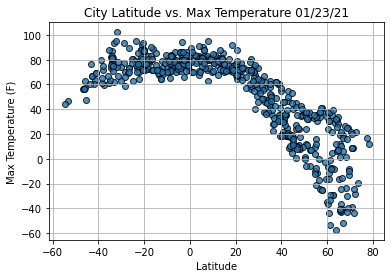

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

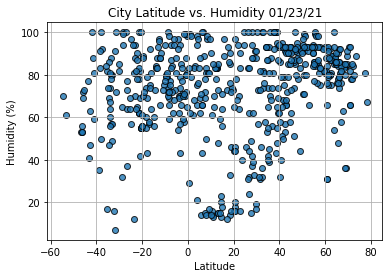

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

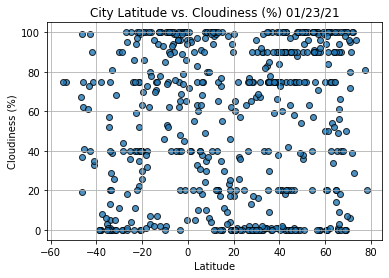

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

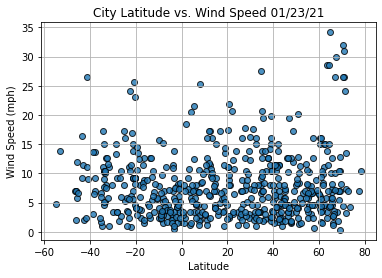

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()